CODE BLOCK: 1

In [1]:
# !pip install torchsummary

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from lib.models import Model1
from lib.utils import model_summary
from lib.utils import train, test

CODE BLOCK: 2

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? True


In [4]:
SEED = 1
torch.manual_seed(SEED)
if cuda:
  torch.cuda.manual_seed(SEED)

CODE BLOCK: 3

In [5]:
# simple transform
simple_transforms = transforms.Compose([
                                     transforms.ToTensor(), 
                                      ])
exp = datasets.MNIST('./data', train=True, download=True, transform=simple_transforms)
exp_data = exp.train_data
exp_data = exp.transform(exp_data.numpy())

print('[Train]')
print(' - Numpy Shape:', exp.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', exp.train_data.size())
print(' - min:', torch.min(exp_data))
print(' - max:', torch.max(exp_data))
print(' - mean:', torch.mean(exp_data))
print(' - std:', torch.std(exp_data))
print(' - var:', torch.var(exp_data))




C:\Users\abhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


In [6]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

CODE BLOCK: 4

In [7]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [8]:
batch_size = 128

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

torch.Size([128, 1, 28, 28])
torch.Size([128])


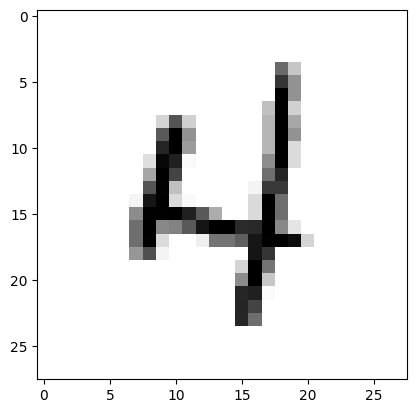

In [9]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

CODE BLOCK: 6

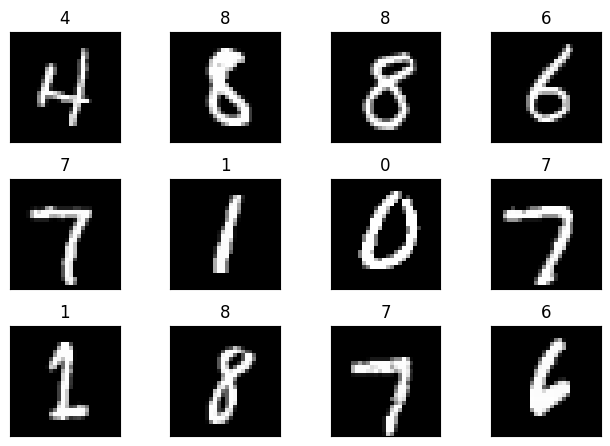

In [9]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [10]:
model_summary(Model1())


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 10, 22, 22]             900
       BatchNorm2d-8           [-1, 10, 22, 22]              20
              ReLU-9           [-1, 10, 22, 22]               0
        MaxPool2d-10           [-1, 10, 11, 11]               0
           Conv2d-11           [-1, 10, 11, 11]             100
      BatchNorm2d-12           [-1, 10, 11, 11]              20
             ReLU-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1

CODE BLOCK: 8

In [13]:
use_cuda = True
device = torch.device("cuda" if use_cuda else "cpu")
model = Model1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

C:\Users\abhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.1351 Batch_id=468 Accuracy=94.16: 100%|██████████| 469/469 [00:27<00:00, 16.90it/s]


Test set: Average loss: 0.0571, Accuracy: 9822/10000 (98.22%)

Epoch 2


Train: Loss=0.0142 Batch_id=468 Accuracy=98.21: 100%|██████████| 469/469 [00:29<00:00, 15.64it/s]


Test set: Average loss: 0.0453, Accuracy: 9855/10000 (98.55%)

Epoch 3


Train: Loss=0.0252 Batch_id=468 Accuracy=98.61: 100%|██████████| 469/469 [00:22<00:00, 20.66it/s]


Test set: Average loss: 0.0407, Accuracy: 9881/10000 (98.81%)

Epoch 4


Train: Loss=0.0117 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:21<00:00, 22.00it/s]


Test set: Average loss: 0.0381, Accuracy: 9873/10000 (98.73%)

Epoch 5


Train: Loss=0.0100 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:17<00:00, 26.91it/s]


Test set: Average loss: 0.0400, Accuracy: 9877/10000 (98.77%)

Epoch 6


Train: Loss=0.0190 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:16<00:00, 28.21it/s]


Test set: Average loss: 0.0358, Accuracy: 9894/10000 (98.94%)

Epoch 7


Train: Loss=0.0062 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:16<00:00, 28.48it/s]


Test set: Average loss: 0.0317, Accuracy: 9902/10000 (99.02%)

Epoch 8


Train: Loss=0.0052 Batch_id=468 Accuracy=99.30: 100%|██████████| 469/469 [00:16<00:00, 28.14it/s]


Test set: Average loss: 0.0313, Accuracy: 9910/10000 (99.10%)

Epoch 9


Train: Loss=0.0063 Batch_id=468 Accuracy=99.37: 100%|██████████| 469/469 [00:16<00:00, 28.67it/s]


Test set: Average loss: 0.0338, Accuracy: 9903/10000 (99.03%)

Epoch 10


Train: Loss=0.0690 Batch_id=468 Accuracy=99.48: 100%|██████████| 469/469 [00:16<00:00, 28.66it/s]


Test set: Average loss: 0.0288, Accuracy: 9914/10000 (99.14%)

Epoch 11


Train: Loss=0.0491 Batch_id=468 Accuracy=99.50: 100%|██████████| 469/469 [00:16<00:00, 28.89it/s]


Test set: Average loss: 0.0354, Accuracy: 9898/10000 (98.98%)

Epoch 12


Train: Loss=0.0069 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:16<00:00, 28.66it/s]


Test set: Average loss: 0.0292, Accuracy: 9916/10000 (99.16%)

Epoch 13


Train: Loss=0.0259 Batch_id=468 Accuracy=99.57: 100%|██████████| 469/469 [00:16<00:00, 29.01it/s]


Test set: Average loss: 0.0291, Accuracy: 9914/10000 (99.14%)

Epoch 14


Train: Loss=0.0108 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:17<00:00, 26.44it/s]


Test set: Average loss: 0.0315, Accuracy: 9907/10000 (99.07%)

Epoch 15


Train: Loss=0.0010 Batch_id=468 Accuracy=99.62: 100%|██████████| 469/469 [00:16<00:00, 28.35it/s]


Test set: Average loss: 0.0310, Accuracy: 9912/10000 (99.12%)

Epoch 16


Train: Loss=0.0035 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:16<00:00, 28.26it/s]


Test set: Average loss: 0.0327, Accuracy: 9909/10000 (99.09%)

Epoch 17


Train: Loss=0.0052 Batch_id=468 Accuracy=99.69: 100%|██████████| 469/469 [00:16<00:00, 27.77it/s]


Test set: Average loss: 0.0287, Accuracy: 9918/10000 (99.18%)

Epoch 18


Train: Loss=0.0058 Batch_id=468 Accuracy=99.73: 100%|██████████| 469/469 [00:15<00:00, 30.18it/s]


Test set: Average loss: 0.0304, Accuracy: 9919/10000 (99.19%)

Epoch 19


Train: Loss=0.0445 Batch_id=468 Accuracy=99.76: 100%|██████████| 469/469 [00:15<00:00, 30.17it/s]


Test set: Average loss: 0.0352, Accuracy: 9894/10000 (98.94%)

Epoch 20


Train: Loss=0.0040 Batch_id=468 Accuracy=99.73: 100%|██████████| 469/469 [00:18<00:00, 24.71it/s]


Test set: Average loss: 0.0312, Accuracy: 9915/10000 (99.15%)



CODE BLOCK: 9

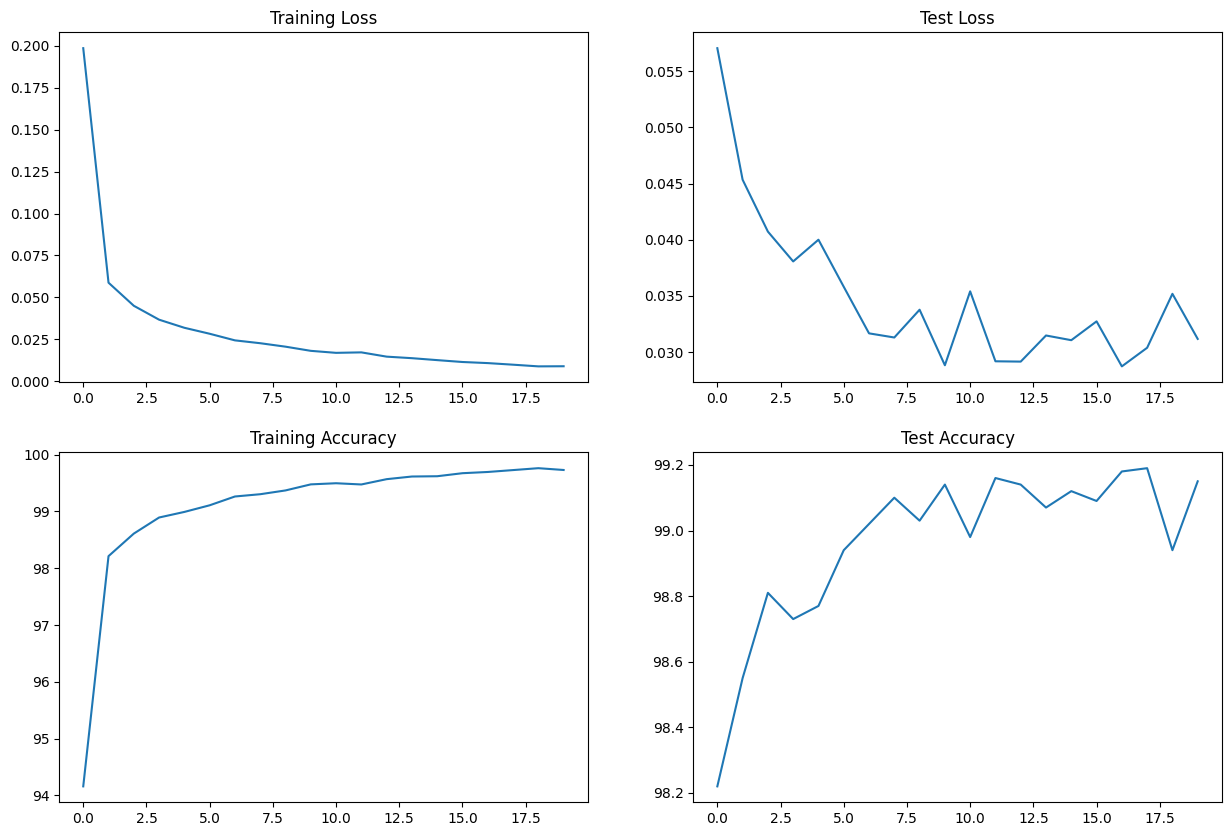

In [14]:
from lib.utils import plot_training
plot_training()

In [15]:
model_summary(Model1())

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]              90
       BatchNorm2d-2           [-1, 10, 26, 26]              20
              ReLU-3           [-1, 10, 26, 26]               0
            Conv2d-4           [-1, 10, 24, 24]             900
       BatchNorm2d-5           [-1, 10, 24, 24]              20
              ReLU-6           [-1, 10, 24, 24]               0
            Conv2d-7           [-1, 10, 22, 22]             900
       BatchNorm2d-8           [-1, 10, 22, 22]              20
              ReLU-9           [-1, 10, 22, 22]               0
        MaxPool2d-10           [-1, 10, 11, 11]               0
           Conv2d-11           [-1, 10, 11, 11]             100
      BatchNorm2d-12           [-1, 10, 11, 11]              20
             ReLU-13           [-1, 10, 11, 11]               0
           Conv2d-14             [-1, 1